In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("messages.csv")

In [3]:
df.head(3)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [5]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [8]:
df.label.value_counts()

0    2363
1     468
Name: label, dtype: int64

<font color=blue> The data we have is skewed, we need to balance the data</data>

In [9]:
spam=df[df['label']==1]
spam.head()

,subject,message,label
21,free,this is a multi-part message in mime format . ...,1
38,the internet success toolbox,note : we do not wish to send e-mail to anyone...,1
84,free stealth 3 . 0 bulk email software . . .,"just released . . . 30 , 000 , 000 email addre...",1
85,need more money ?,"hi , would you like to earn an extra $ 700 a w...",1
86,cable decsrambler now only $ 6 . 99 !,this is really cool ! premium channels and pay...,1


In [10]:
ham=df[df['label']==0]
ham.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0


In [11]:
ham.shape, spam.shape

((2363, 3), (468, 3))

In [12]:
ham=ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((468, 3), (468, 3))

In [14]:
data=ham.append(spam,ignore_index=True)
data.head(), data.tail()

(                                             subject  \
 0                               available for review   
 1  vilem mathesius lecture series 13 - prague , n...   
 2                        re : 5 . 1467 qs : metaling   
 3                avail for review : syntax , chomsky   
 4                              new books : phonology   
 
                                              message  label  
 0  the book listed below is in the linguist offic...      0  
 1  the vilem mathesius centre for research and ed...      0  
 2  ther term " metalinguistics " comes from benja...      0  
 3  the books listed below are in the linguist off...      0  
 4  wang jialing and norval smith ( editors ) stud...      0  ,
                                 subject  \
 931  did that work for you ? - calsvxtn   
 932       from fanny , recommending nek   
 933         win $ 300usd and a cruise !   
 934        love your profile - ysuolvpv   
 935  you have been asked to join kiddin   
 
           

<font color=green> Exploratory Data Analysis </font>

In [15]:
data["Length"]=[len(i) for i in data.message]

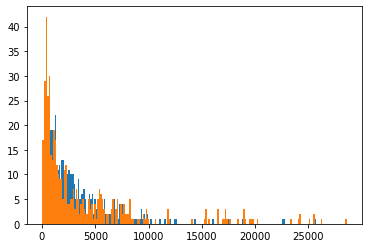

In [16]:
plt.hist(data[data["label"]==0].Length, bins=200)
plt.hist(data[data["label"]==1].Length, bins=200)
plt.show()

<font color=green> Data Preparation</font>

In [17]:
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
X_train, X_test, y_train, y_test=split(data["message"], data["label"], test_size=.2, random_state=123, shuffle=True)

<font color=green> Bag of Words</font>

In [20]:
vectorizer=TfidfVectorizer()

In [21]:
X_train=vectorizer.fit_transform(X_train)

In [22]:
X_train.shape

(748, 25359)

In [24]:
clf=Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier())])

In [25]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [26]:
y_pred=clf.predict(X_test)

In [29]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[103,   0],
       [  0,  85]])

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        85

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [31]:
score=accuracy_score(y_test,y_pred)
print("Accuracy score:", score)

Accuracy score: 1.0


In [33]:
clf=Pipeline([("tfidf", TfidfVectorizer()), ("clf", SVC())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy score:", score)

Accuracy score: 0.9946808510638298


In [34]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[103,   0],
       [  1,  84]])

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.99      0.99        85

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [36]:
final_model=SVC()
from sklearn.externals import joblib
joblib.dump(final_model, "spam_predictor.obj")

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['spam_predictor.obj']